# Visualization and Exploratory data

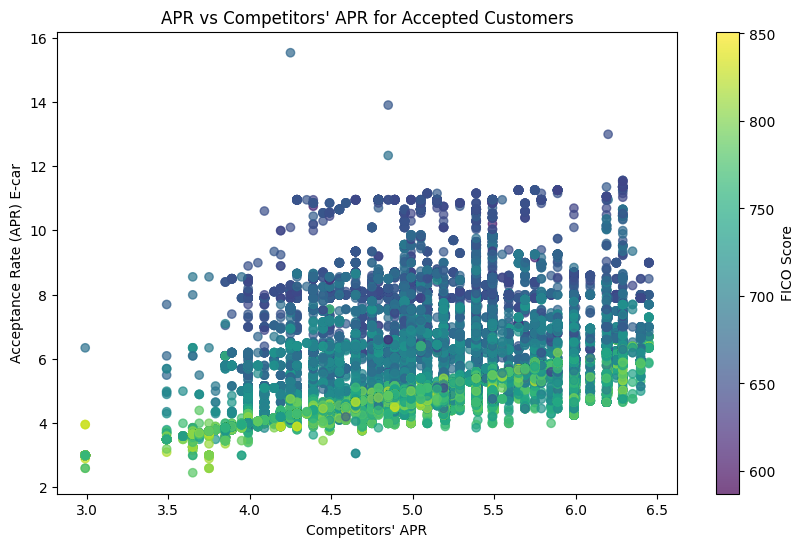

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('nomis1.csv')


df = df.drop('Approve Date', axis=1)

# Filter data for accepted customers
accepted_df = df[df['Accept?'] == 1]

# Plot APR and Competitors' APR for accepted customers
plt.figure(figsize=(10, 6))
plt.scatter(accepted_df['Competition rate'], accepted_df['Rate'], c=accepted_df['FICO'], cmap='viridis', alpha=0.7)
plt.colorbar(label='FICO Score')
plt.xlabel("Competitors' APR")
plt.ylabel('Acceptance Rate (APR) E-car')
plt.title('APR vs Competitors\' APR for Accepted Customers')
plt.show()


In [ ]:
df.dropna(inplace=True)
df


,Tier,FICO,Term,Amount,Previous Rate,Car Type,Competition rate,Accept?,Rate,Cost of Funds,Partner Bin
0,3.0,695.0,72.0,35000.0,,N,6.25,0.0,7.49,1.8388,1.0
1,1.0,751.0,60.0,40000.0,,N,5.65,0.0,5.49,1.8388,3.0
2,1.0,731.0,60.0,18064.0,,N,5.65,0.0,5.49,1.8388,3.0
3,4.0,652.0,72.0,15415.0,,N,6.25,0.0,8.99,1.8388,3.0
4,1.0,730.0,48.0,32000.0,,N,5.65,0.0,5.49,1.8388,1.0
...,...,...,...,...,...,...,...,...,...,...,...
208072,1.0,777.0,48.0,35000.0,,N,4.45,0.0,4.45,2.1270,3.0
208073,1.0,790.0,60.0,25000.0,,N,4.45,0.0,4.45,2.1270,3.0
208074,4.0,663.0,60.0,31800.0,,N,4.45,0.0,10.85,2.1270,3.0
208075,1.0,742.0,60.0,33000.0,,N,4.45,0.0,4.45,2.1270,1.0


In [ ]:
is_empty = df.empty

if is_empty:
    print("DataFrame is empty.")
else:
    print("DataFrame is not empty.")

DataFrame is not empty.


In [ ]:
print(df.dtypes)
df.columns


Tier                float64
FICO                float64
Term                float64
Amount              float64
Previous Rate        object
Car  Type            object
Competition rate    float64
Accept?             float64
Rate                float64
Cost of Funds       float64
Partner Bin         float64
dtype: object


Index(['Tier', 'FICO', 'Term', 'Amount', 'Previous Rate', 'Car  Type',
       'Competition rate', 'Accept?', 'Rate', 'Cost of Funds', 'Partner Bin'],
      dtype='object')

In [ ]:
df['Previous Rate'] = pd.to_numeric(df['Previous Rate'], errors='coerce')
df['Previous Rate'] = df['Previous Rate'].fillna(0)
#df['Car  Type'] = pd.to_numeric(df['Car  Type'], errors='coerce')
df['Car  Type'] = df['Car  Type'].replace(0, 'Unknown')


In [ ]:
print(df.dtypes)

Tier                float64
FICO                float64
Term                float64
Amount              float64
Previous Rate       float64
Car  Type            object
Competition rate    float64
Accept?             float64
Rate                float64
Cost of Funds       float64
Partner Bin         float64
dtype: object


In [ ]:
df

,Tier,FICO,Term,Amount,Previous Rate,Car Type,Competition rate,Accept?,Rate,Cost of Funds,Partner Bin
0,3.0,695.0,72.0,35000.0,0.0,N,6.25,0.0,7.49,1.8388,1.0
1,1.0,751.0,60.0,40000.0,0.0,N,5.65,0.0,5.49,1.8388,3.0
2,1.0,731.0,60.0,18064.0,0.0,N,5.65,0.0,5.49,1.8388,3.0
3,4.0,652.0,72.0,15415.0,0.0,N,6.25,0.0,8.99,1.8388,3.0
4,1.0,730.0,48.0,32000.0,0.0,N,5.65,0.0,5.49,1.8388,1.0
...,...,...,...,...,...,...,...,...,...,...,...
208072,1.0,777.0,48.0,35000.0,0.0,N,4.45,0.0,4.45,2.1270,3.0
208073,1.0,790.0,60.0,25000.0,0.0,N,4.45,0.0,4.45,2.1270,3.0
208074,4.0,663.0,60.0,31800.0,0.0,N,4.45,0.0,10.85,2.1270,3.0
208075,1.0,742.0,60.0,33000.0,0.0,N,4.45,0.0,4.45,2.1270,1.0


# **Comparing APR distrubution and Coverstion Rate**

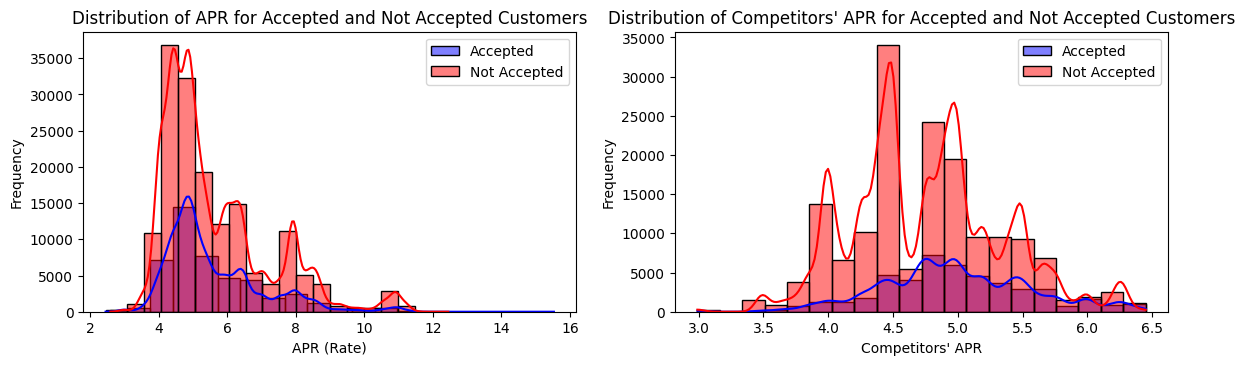

In [ ]:

import seaborn as sns

plt.figure(figsize=(14, 8))

# Histogram for APRs
plt.subplot(2, 2, 1)
sns.histplot(df[df['Accept?'] == 1]['Rate'], bins=20, color='blue', kde=True, label='Accepted')
sns.histplot(df[df['Accept?'] == 0]['Rate'], bins=20, color='red', kde=True, label='Not Accepted')
plt.xlabel('APR (Rate)')
plt.ylabel('Frequency')
plt.title('Distribution of APR for Accepted and Not Accepted Customers')
plt.legend()

# Histogram for Competitors' APRs
plt.subplot(2, 2, 2)
sns.histplot(df[df['Accept?'] == 1]['Competition rate'], bins=20, color='blue', kde=True, label='Accepted')
sns.histplot(df[df['Accept?'] == 0]['Competition rate'], bins=20, color='red', kde=True, label='Not Accepted')
plt.xlabel("Competitors' APR")
plt.ylabel('Frequency')
plt.title('Distribution of Competitors\' APR for Accepted and Not Accepted Customers')
plt.legend()




# **Acceptance count based on type of Cars**

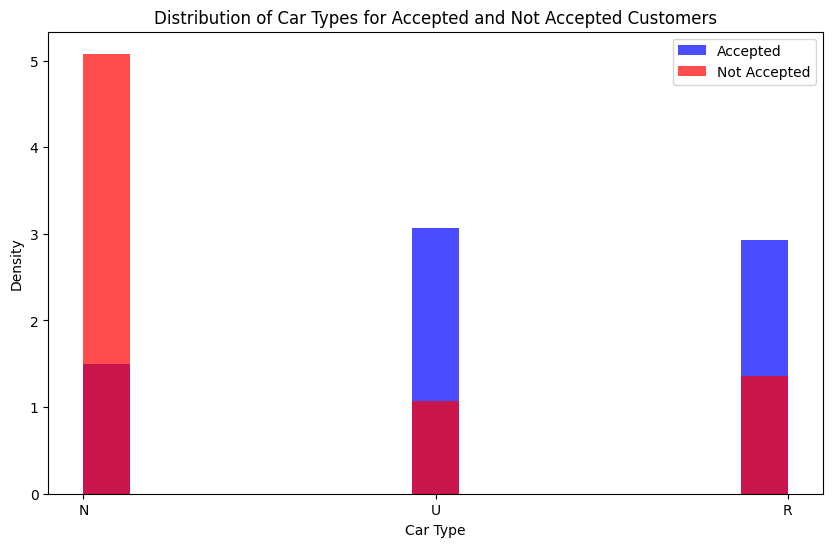

In [ ]:

# Plot histograms for car types
plt.figure(figsize=(10, 6))

# Histogram for Car Types - Accepted
plt.hist(df[df['Accept?'] == 1]['Car  Type'], bins=15, color='blue',alpha=0.7, label='Accepted', density=True)

# Histogram for Car Types - Not Accepted
plt.hist(df[df['Accept?'] == 0]['Car  Type'], bins=15, color='red', alpha=0.7,label='Not Accepted',density=True)

plt.xlabel('Car Type')
plt.ylabel('Density')
plt.title('Distribution of Car Types for Accepted and Not Accepted Customers')
plt.legend()
plt.show()

# **Loan Term and Acceptance Rate**

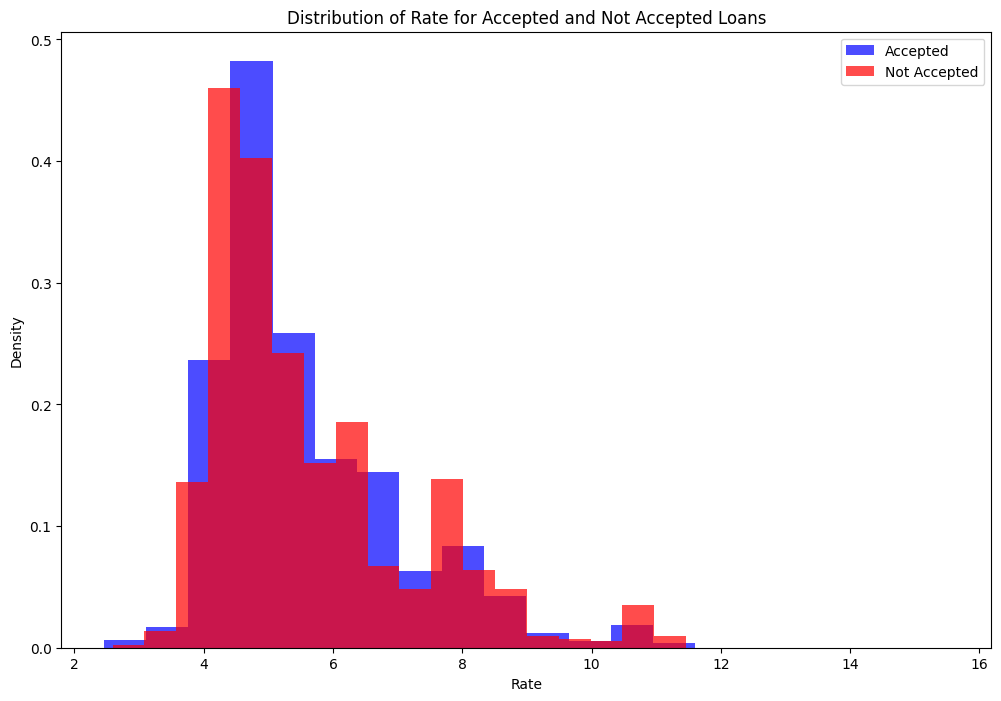

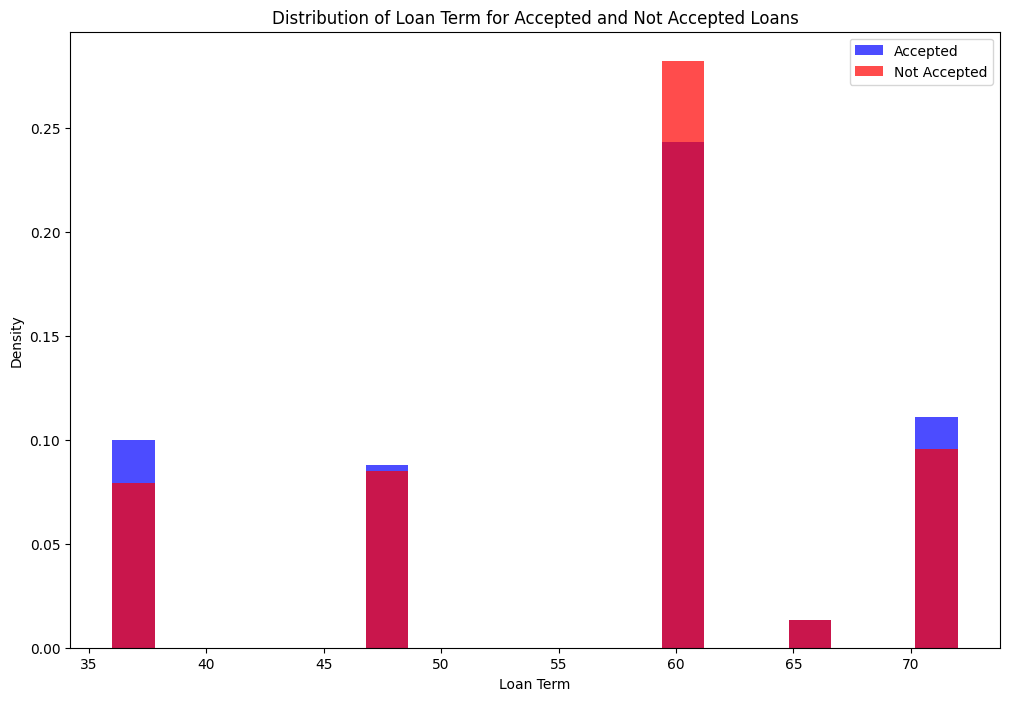

In [ ]:
# Create histograms for Rate based on Acceptance status
plt.figure(figsize=(12, 8))

# Histogram for Rate - Accepted
plt.hist(df[df['Accept?'] == 1]['Rate'], bins=20, color='blue', alpha=0.7, label='Accepted', density=True)

# Histogram for Rate - Not Accepted
plt.hist(df[df['Accept?'] == 0]['Rate'], bins=20, color='red', alpha=0.7, label='Not Accepted', density=True)

plt.xlabel('Rate')
plt.ylabel('Density')
plt.title('Distribution of Rate for Accepted and Not Accepted Loans')
plt.legend()
plt.show()

# Create histograms for Loan Term based on Acceptance status
plt.figure(figsize=(12, 8))

# Histogram for Loan Term - Accepted
plt.hist(df[df['Accept?'] == 1]['Term'], bins=20, color='blue', alpha=0.7, label='Accepted', density=True)

# Histogram for Loan Term - Not Accepted
plt.hist(df[df['Accept?'] == 0]['Term'], bins=20, color='red', alpha=0.7, label='Not Accepted', density=True)

plt.xlabel('Loan Term')
plt.ylabel('Density')
plt.title('Distribution of Loan Term for Accepted and Not Accepted Loans')
plt.legend()
plt.show()

# **Diving further into Competitors Rate/Compared to E-car**

In [ ]:
# Remove rows with NaN values
df = df.dropna()

# Create a new column for Rate/Competition Rate
df['Rate/Competition Rate'] = df['Rate'] / df['Competition rate']

# Display the updated DataFrame
print(df.head())

# We divided e-car rate by competition Rate.
#A value >1 indicates e-car rate is greater than competition rate where as <1 is e-car has lower rate

   Tier   FICO  Term   Amount  Previous Rate Car  Type  Competition rate  \
0   3.0  695.0  72.0  35000.0            0.0         N              6.25   
1   1.0  751.0  60.0  40000.0            0.0         N              5.65   
2   1.0  731.0  60.0  18064.0            0.0         N              5.65   
3   4.0  652.0  72.0  15415.0            0.0         N              6.25   
4   1.0  730.0  48.0  32000.0            0.0         N              5.65   

   Accept?  Rate  Cost of Funds  Partner Bin  Rate/Competition Rate  
0      0.0  7.49         1.8388          1.0               1.198400  
1      0.0  5.49         1.8388          3.0               0.971681  
2      0.0  5.49         1.8388          3.0               0.971681  
3      0.0  8.99         1.8388          3.0               1.438400  
4      0.0  5.49         1.8388          1.0               0.971681  


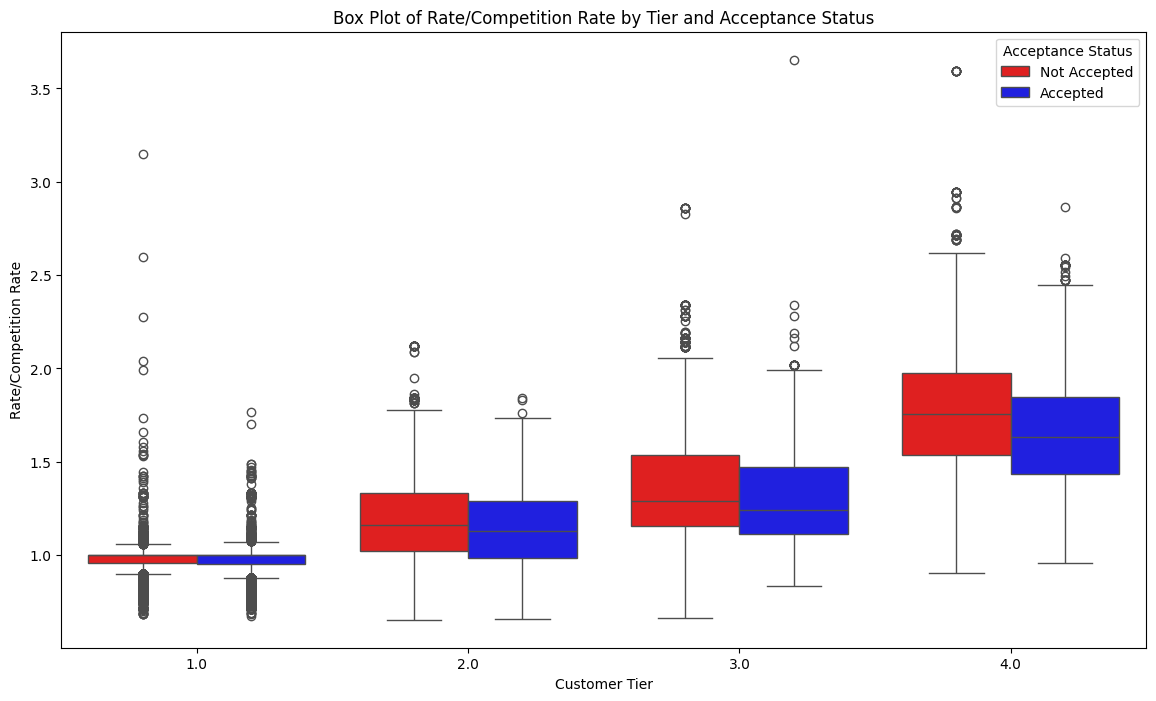

In [ ]:
# Box plot for Rate/Competition Rate by Tier and Acceptance Status
plt.figure(figsize=(14, 8))
box_plot = sns.boxplot(x='Tier', y='Rate/Competition Rate', hue='Accept?', data=df, palette={0: 'red', 1: 'blue'})
plt.xlabel('Customer Tier')
plt.ylabel('Rate/Competition Rate')
plt.title('Box Plot of Rate/Competition Rate by Tier and Acceptance Status')

# Adjust legend handle lengths
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[0:2], title='Acceptance Status', labels=['Not Accepted', 'Accepted'])
plt.show()

## **Analysis**

In [ ]:
#number of accepted loans
AcceptedLoans = df[df['Accept?'] == 1]
num_AcceptedLoans = len(AcceptedLoans)
print("Accepted Loans:",num_AcceptedLoans)

# not accepted Loans
NA_AllLoans = len(df[df['Accept?'] == 0])
print("Loans Offered not Accepted:", NA_AllLoans)

Accepted Loans: 45785
Loans Offered not Accepted: 162292


# **A. Logistic Regression**

In [ ]:
# Rename columns to make them one word
df.rename(columns={
    'Previous Rate': 'PreviousRate',
    'Car  Type': 'CarType',
    'Competition rate': 'CompetitionRate',
    'Cost of Funds': 'CostOfFunds',
    'Partner Bin': 'PartnerBin',
    'Accept?': 'Accept'
}, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
traindata= 0.7


df_train, df_test = train_test_split(df, test_size=(1 - traindata), random_state=44)

print(df_train.shape[0])
print(df_test.shape[0])

145653
62424


Baseline accuracy

In [ ]:
from sklearn.metrics import accuracy_score


baseline_accuracy = df[df['Accept'] == 1].shape[0] / df.shape[0]

print("Baseline Accuracy:", baseline_accuracy)





Baseline Accuracy: 0.2200387356603565


# LosticRegression from Statsmodel

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler



y = df_train['Accept']
X = df_train[['Tier', 'FICO', 'Term', 'Amount', 'PreviousRate', 'CarType', 'CompetitionRate', 'Rate', 'CostOfFunds', 'PartnerBin']]

# Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['CarType'], prefix='CarType')

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant term to the input for the intercept
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Fit logistic regression model with Ridge regularization
model = sm.Logit(y_train, X_train_scaled)
result = model.fit_regularized(method='l1')

# Inverse transform the scaled features
X_train_original_scale = scaler.inverse_transform(X_train_scaled[:, 1:])
X_test_original_scale = scaler.inverse_transform(X_test_scaled[:, 1:])


X_train_original_scale = pd.DataFrame(X_train_original_scale, columns=list(X_encoded.columns))
X_test_original_scale = pd.DataFrame(X_test_original_scale, columns=list(X_encoded.columns))


# Display the result summary
# Ensure that xname has the correct length (number of coefficients + 1 for intercept)
xname = ['Intercept'] + list(X_encoded.columns)
print("\nLogistic Regression Result Summary:")
print(result.summary(xname=xname))



Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.38786439243354476
            Iterations: 56
            Function evaluations: 56
            Gradient evaluations: 56

Logistic Regression Result Summary:
                           Logit Regression Results                           
Dep. Variable:                 Accept   No. Observations:               116522
Model:                          Logit   Df Residuals:                   116509
Method:                           MLE   Df Model:                           12
Date:                Wed, 21 Feb 2024   Pseudo R-squ.:                  0.2632
Time:                        21:20:46   Log-Likelihood:                -45195.
converged:                       True   LL-Null:                       -61343.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

In [ ]:
# Make predictions on the test set
y_pred = result.predict(X_test_scaled)
y_pred_class = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy)

Accuracy: 0.8306271669355669


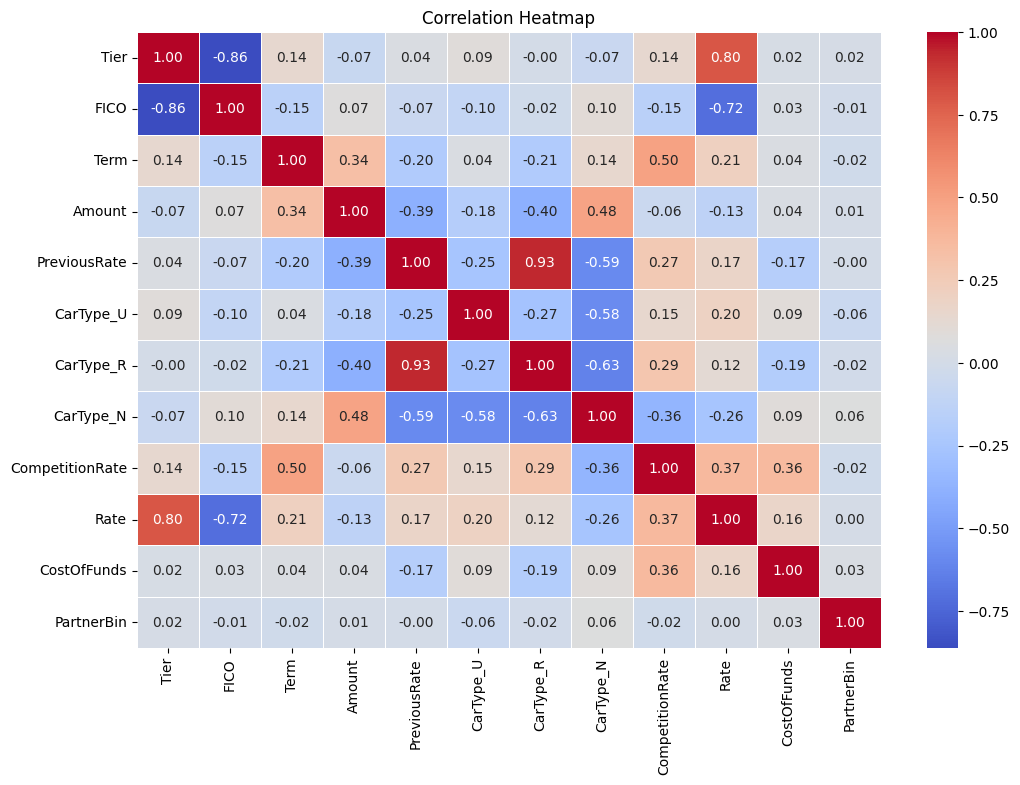

In [ ]:


# Check for multicollinearity
correlation_matrix = X_encoded[['Tier', 'FICO', 'Term', 'Amount', 'PreviousRate', 'CarType_U', 'CarType_R', 'CarType_N', 'CompetitionRate', 'Rate', 'CostOfFunds', 'PartnerBin']].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()




# **# Rate Matching and Loan Term Optimization**

**Matching the competitors Rate**

In [ ]:
#at the moment we have 22% acceptance rate, we will match the rate ecar is giving out to the competetors rate and see if acceptance rate would change

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame containing the data

# Create a copy of the DataFrame to avoid modifying the original DataFrame
df_new = df.copy()

# Add a new column 'MatchedRate' with the values from 'CompetitionRate'
df_new['MatchedRate'] = df['CompetitionRate']

# Create a MinMaxScaler object
#scaler = MinMaxScaler(feature_range=(45, 70))

# Fit the scaler to the 'Term' column and transform it
#df_new['Term'] = scaler.fit_transform(df_new[['Term']])

# Drop the original 'Rate' column and rename 'MatchedRate' to 'Rate'
df_new.drop(columns=['Rate'], inplace=True)
df_new.rename(columns={'MatchedRate': 'Rate'}, inplace=True)
df_new['Term'] = df_new['Term'].apply(lambda x: 45 if x < 45 else (70 if x > 70 else x))

# Display the modified DataFrame
print(df_new)


        Tier   FICO  Term   Amount  PreviousRate CarType  CompetitionRate  \
0        3.0  695.0  70.0  35000.0           0.0       N             6.25   
1        1.0  751.0  60.0  40000.0           0.0       N             5.65   
2        1.0  731.0  60.0  18064.0           0.0       N             5.65   
3        4.0  652.0  70.0  15415.0           0.0       N             6.25   
4        1.0  730.0  48.0  32000.0           0.0       N             5.65   
...      ...    ...   ...      ...           ...     ...              ...   
208072   1.0  777.0  48.0  35000.0           0.0       N             4.45   
208073   1.0  790.0  60.0  25000.0           0.0       N             4.45   
208074   4.0  663.0  60.0  31800.0           0.0       N             4.45   
208075   1.0  742.0  60.0  33000.0           0.0       N             4.45   
208078   3.0  685.0  60.0  20022.0           8.0       R             5.55   

        Accept  CostOfFunds  PartnerBin  Rate/Competition Rate  Rate  
0   

In [ ]:
import statsmodels.api as sm

# Extract features for prediction
X_pred = df_new[['Tier', 'FICO', 'Term', 'Amount', 'PreviousRate', 'CarType', 'CompetitionRate', 'Rate', 'CostOfFunds', 'PartnerBin']]
# Encode categorical variables using one-hot encoding
X_pred_encoded = pd.get_dummies(X_pred, columns=['CarType'], prefix='CarType')

# Scale the features using the same scaler from training
X_pred_scaled = scaler.transform(X_pred_encoded)

# Add a constant term to the input for the intercept
X_pred_scaled = sm.add_constant(X_pred_scaled)

# Make predictions
Dpredictions = result.predict(X_pred_scaled)

df_new['Predictions'] = (Dpredictions > 0.5).astype(int)
df_new



,Tier,FICO,Term,Amount,PreviousRate,CarType,CompetitionRate,Accept,CostOfFunds,PartnerBin,Rate/Competition Rate,Rate,Predictions
0,3.0,695.0,70.0,35000.0,0.0,N,6.25,0.0,1.8388,1.0,1.198400,6.25,0
1,1.0,751.0,60.0,40000.0,0.0,N,5.65,0.0,1.8388,3.0,0.971681,5.65,0
2,1.0,731.0,60.0,18064.0,0.0,N,5.65,0.0,1.8388,3.0,0.971681,5.65,0
3,4.0,652.0,70.0,15415.0,0.0,N,6.25,0.0,1.8388,3.0,1.438400,6.25,0
4,1.0,730.0,48.0,32000.0,0.0,N,5.65,0.0,1.8388,1.0,0.971681,5.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208072,1.0,777.0,48.0,35000.0,0.0,N,4.45,0.0,2.1270,3.0,1.000000,4.45,0
208073,1.0,790.0,60.0,25000.0,0.0,N,4.45,0.0,2.1270,3.0,1.000000,4.45,0
208074,4.0,663.0,60.0,31800.0,0.0,N,4.45,0.0,2.1270,3.0,2.438202,4.45,0
208075,1.0,742.0,60.0,33000.0,0.0,N,4.45,0.0,2.1270,1.0,1.000000,4.45,0


In [ ]:
#number of accepted loans
AcceptedLoans = df_new[df_new['Accept'] == 1]
num_AcceptedLoans = len(AcceptedLoans)
print("Accepted Loans:",num_AcceptedLoans)

ModifiedAcceptedLoans= df_new[df_new['Predictions'] == 1]
num_MAcceptedLoans = len(ModifiedAcceptedLoans)
print("Predicted Acceptance:",num_MAcceptedLoans)

# not accepted Loans
NA_AllLoans = len(df_new[df_new ['Accept'] == 0])
print("Loans Offered not Accepted:", NA_AllLoans)

# not accepted Loans
Modified_AllLoans = len(df_new[df_new['Predictions'] == 0])
print(" Predicton Loans Offered not Accepted:",Modified_AllLoans )

Accepted Loans: 45785
Predicted Acceptance: 52252
Loans Offered not Accepted: 162292
 Predicton Loans Offered not Accepted: 155825


**The predicted acceptance rate is 25% and just by matching the competetion rate and optimizing loan term we have increased the profit by ~10%. It was 22% initially.Although this is a good boost in profit increase, it's not easy to implement as it is hard to estimate competitors rate. We will investigate on how we can strategically and dynamically adjust our interest rates to benefit our customers. **

#  **Introduction of Tier Segmentation**

We will start by segmenting the tiers further. Previously e-car had 4 tiers and per the proposal we will create 8 tiers and offer different dynamic interest rate.

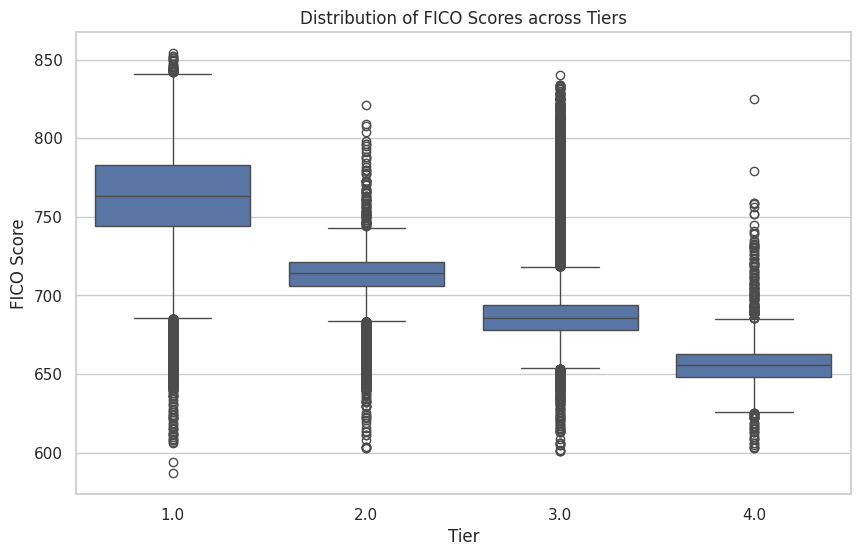

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Create a box plot of FICO scores across different tiers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tier', y='FICO', data=df_new)
plt.title('Distribution of FICO Scores across Tiers')
plt.xlabel('Tier')
plt.ylabel('FICO Score')
plt.show()



In [ ]:
#using the median we will divide customers in to two groups within each tier.

import pandas as pd

# Calculate median FICO score for each tier
median_fico_per_tier = df_new.groupby('Tier')['FICO'].median()

# Define a function to assign subclass based on median FICO score
def assign_tier_subclass(row):
    tier = row['Tier']
    fico = row['FICO']
    median_fico = median_fico_per_tier[tier]
    if fico >= median_fico:
        return tier * 2 - 1  # Higher FICO subclass
    else:
        return tier * 2  # Lower FICO subclass

# Apply the function to create the TierSubclass column
df_new['TierSubclass'] = df_new.apply(assign_tier_subclass, axis=1)


# Display the DataFrame with TierSubclass
print(df_new)

        Tier   FICO  Term   Amount  PreviousRate CarType  CompetitionRate  \
0        3.0  695.0  70.0  35000.0           0.0       N             6.25   
1        1.0  751.0  60.0  40000.0           0.0       N             5.65   
2        1.0  731.0  60.0  18064.0           0.0       N             5.65   
3        4.0  652.0  70.0  15415.0           0.0       N             6.25   
4        1.0  730.0  48.0  32000.0           0.0       N             5.65   
...      ...    ...   ...      ...           ...     ...              ...   
208072   1.0  777.0  48.0  35000.0           0.0       N             4.45   
208073   1.0  790.0  60.0  25000.0           0.0       N             4.45   
208074   4.0  663.0  60.0  31800.0           0.0       N             4.45   
208075   1.0  742.0  60.0  33000.0           0.0       N             4.45   
208078   3.0  685.0  60.0  20022.0           8.0       R             5.55   

        Accept  CostOfFunds  PartnerBin  Rate/Competition Rate  Rate  \
0  

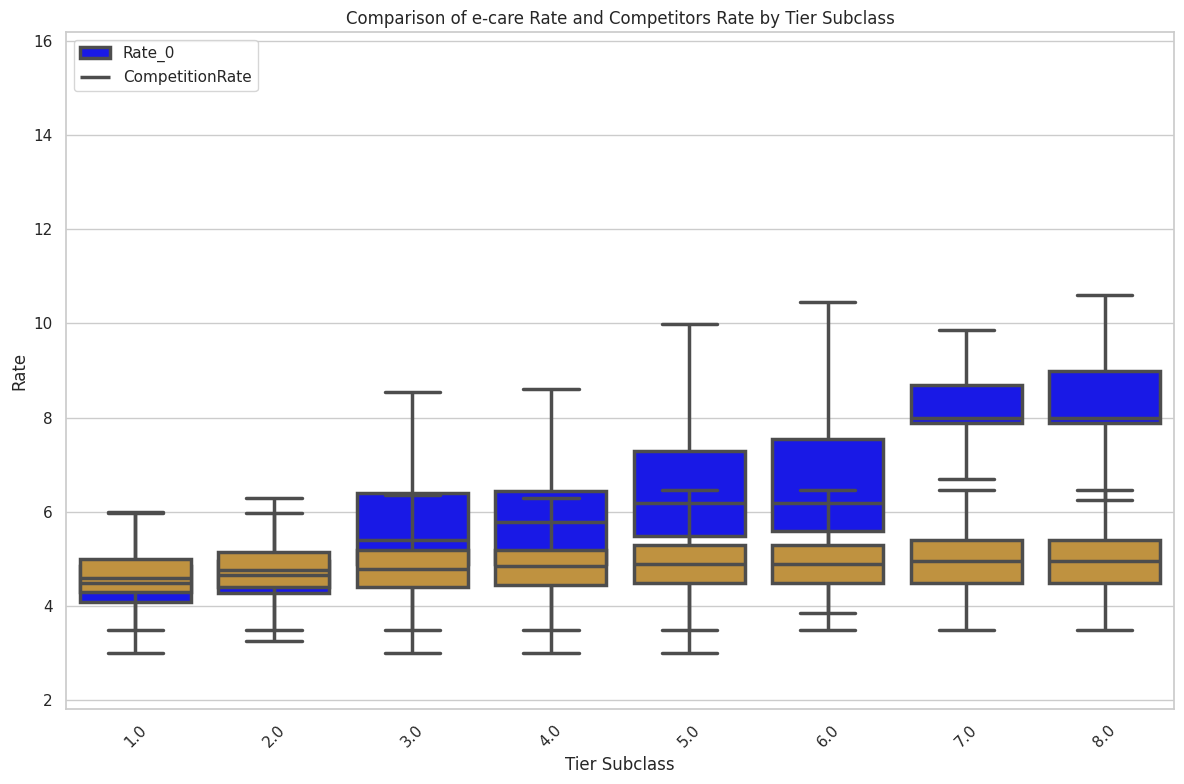

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_1= pd.read_csv('nomis1.csv')

#bring back the original Rate for comparison
df_new['Rate_o']=df_1['Rate']

# Set the style of the plot
sns.set(style="whitegrid")

# Create a box plot of Rate and CompetitionRate grouped by TierSubclass
plt.figure(figsize=(12, 8))

# Plot Rate box plot with transparency and custom color
sns.boxplot(x='TierSubclass', y='Rate_o', data=df_new, color='blue', saturation=0.8, linewidth=2.5, fliersize=0)

# Plot CompetitionRate box plot with transparency and custom color
sns.boxplot(x='TierSubclass', y='CompetitionRate', data=df_new, color='orange', saturation=0.5, linewidth=2.5, fliersize=0)

# Add legend with custom labels and colors
plt.legend(labels=['Rate_0', 'CompetitionRate'], loc='upper left')

# Add title and labels
plt.title('Comparison of e-care Rate and Competitors Rate by Tier Subclass')
plt.xlabel('Tier Subclass')
plt.ylabel('Rate')

# Adjust plot layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


After segmenting the customers even further we can see that e-car's interest rate is way higher and a business decision needs to be made to lower the interest rate and by how much?  Matching the competetors rate only allowed ~3% increase in the acceptance rate. This is has to be carefully measured to avoid defaults.

Looking back at our explarotory data , longer term or terms around 60 month are favored by costomers. So we can lower interest rate and increase loan term. this will increase the affordability for customers and revenue for e-car. We will normilize loan rate from 45-70months.

In [ ]:
#Based on this new tier we will offer a modified dynamic interest rate
# Define dynamic interest rate rules based on tier and subclass
def calculate_dynamic_interest_rate(row, rate_col):
    tier = row['Tier']
    subclass = row['TierSubclass']

    # Define interest rate rules based on tier and subclass
    if tier == 1:
        if subclass == 1:
            return rate_col * 1.0  # Lower FICO, lower tier
        else:
            return rate_col * 0.95  # Higher FICO, lower tier
    elif tier == 2:
        if subclass == 3:
            return rate_col * 0.7  # Lower FICO, higher tier
        else:
            return rate_col * 0.6  # Higher FICO, higher tier
    elif tier == 3:
        if subclass == 5:
            return rate_col * 0.55  # Lower FICO, lower tier
        else:
            return rate_col * 0.55  # Higher FICO, lower tier
    elif tier == 4:
        if subclass == 7:
            return rate_col * 0.55  # Lower FICO, higher tier
        else:
            return rate_col * 0.45  # Higher FICO, higher tier

# Apply the function to create the Dynamic Interest Rate column
df_new['Dynamic Interest Rate'] = df_new.apply(lambda row: calculate_dynamic_interest_rate(row, row['Rate_o']), axis=1)

# Display the DataFrame with the Dynamic Interest Rate
print(df_new)


        Tier   FICO  Term   Amount  PreviousRate CarType  CompetitionRate  \
0        3.0  695.0  70.0  35000.0           0.0       N             6.25   
1        1.0  751.0  60.0  40000.0           0.0       N             5.65   
2        1.0  731.0  60.0  18064.0           0.0       N             5.65   
3        4.0  652.0  70.0  15415.0           0.0       N             6.25   
4        1.0  730.0  48.0  32000.0           0.0       N             5.65   
...      ...    ...   ...      ...           ...     ...              ...   
208072   1.0  777.0  48.0  35000.0           0.0       N             4.45   
208073   1.0  790.0  60.0  25000.0           0.0       N             4.45   
208074   4.0  663.0  60.0  31800.0           0.0       N             4.45   
208075   1.0  742.0  60.0  33000.0           0.0       N             4.45   
208078   3.0  685.0  60.0  20022.0           8.0       R             5.55   

        Accept  CostOfFunds  PartnerBin  Rate/Competition Rate  Rate  \
0  

In [ ]:
df_dynamic=df_new
df_dynamic.drop(columns=['Rate', 'Rate_o'], inplace=True)
df_dynamic.rename(columns={'Dynamic Interest Rate': 'Rate'}, inplace=True)
df_dynamic

,Tier,FICO,Term,Amount,PreviousRate,CarType,CompetitionRate,Accept,CostOfFunds,PartnerBin,Rate/Competition Rate,Predictions,TierSubclass,Rate
0,3.0,695.0,70.0,35000.0,0.0,N,6.25,0.0,1.8388,1.0,1.198400,0,5.0,4.1195
1,1.0,751.0,60.0,40000.0,0.0,N,5.65,0.0,1.8388,3.0,0.971681,0,2.0,5.2155
2,1.0,731.0,60.0,18064.0,0.0,N,5.65,0.0,1.8388,3.0,0.971681,0,2.0,5.2155
3,4.0,652.0,70.0,15415.0,0.0,N,6.25,0.0,1.8388,3.0,1.438400,0,8.0,4.0455
4,1.0,730.0,48.0,32000.0,0.0,N,5.65,0.0,1.8388,1.0,0.971681,0,2.0,5.2155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208072,1.0,777.0,48.0,35000.0,0.0,N,4.45,0.0,2.1270,3.0,1.000000,0,1.0,4.4500
208073,1.0,790.0,60.0,25000.0,0.0,N,4.45,0.0,2.1270,3.0,1.000000,0,1.0,4.4500
208074,4.0,663.0,60.0,31800.0,0.0,N,4.45,0.0,2.1270,3.0,2.438202,0,7.0,5.9675
208075,1.0,742.0,60.0,33000.0,0.0,N,4.45,0.0,2.1270,1.0,1.000000,0,2.0,4.2275


In [ ]:
#now lets use the trained model to predict profit

import statsmodels.api as sm

# Extract features for prediction
X_dynamic = df_dynamic[['Tier', 'FICO', 'Term', 'Amount', 'PreviousRate', 'CarType', 'CompetitionRate', 'Rate', 'CostOfFunds', 'PartnerBin']]
# Encode categorical variables using one-hot encoding
X_pred_dynamic = pd.get_dummies(X_dynamic, columns=['CarType'], prefix='CarType')

# Scale the features using the same scaler from training
X_pred_scaled = scaler.transform(X_pred_dynamic)

# Add a constant term to the input for the intercept
X_dynamic_scaled = sm.add_constant(X_pred_scaled)

# Make predictions
Dynamicpredictions = result.predict(X_dynamic_scaled)

df_new['Predictions_Dynamic'] = (Dynamicpredictions > 0.5).astype(int)
df_new

,Tier,FICO,Term,Amount,PreviousRate,CarType,CompetitionRate,Accept,CostOfFunds,PartnerBin,Rate/Competition Rate,Predictions,TierSubclass,Rate,Predictions_Dynamic
0,3.0,695.0,70.0,35000.0,0.0,N,6.25,0.0,1.8388,1.0,1.198400,0,5.0,4.1195,0
1,1.0,751.0,60.0,40000.0,0.0,N,5.65,0.0,1.8388,3.0,0.971681,0,2.0,5.2155,0
2,1.0,731.0,60.0,18064.0,0.0,N,5.65,0.0,1.8388,3.0,0.971681,0,2.0,5.2155,0
3,4.0,652.0,70.0,15415.0,0.0,N,6.25,0.0,1.8388,3.0,1.438400,0,8.0,4.0455,1
4,1.0,730.0,48.0,32000.0,0.0,N,5.65,0.0,1.8388,1.0,0.971681,0,2.0,5.2155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208072,1.0,777.0,48.0,35000.0,0.0,N,4.45,0.0,2.1270,3.0,1.000000,0,1.0,4.4500,0
208073,1.0,790.0,60.0,25000.0,0.0,N,4.45,0.0,2.1270,3.0,1.000000,0,1.0,4.4500,0
208074,4.0,663.0,60.0,31800.0,0.0,N,4.45,0.0,2.1270,3.0,2.438202,0,7.0,5.9675,0
208075,1.0,742.0,60.0,33000.0,0.0,N,4.45,0.0,2.1270,1.0,1.000000,0,2.0,4.2275,0


In [ ]:
#predicting acceptance rate
#number of accepted loans
AcceptedLoans = df_new[df_new['Accept'] == 1]
num_AcceptedLoans = len(AcceptedLoans)
print("Accepted Loans:",num_AcceptedLoans)

ModifiedAcceptedLoans= df_new[df_new['Predictions_Dynamic'] == 1]
num_MAcceptedLoans = len(ModifiedAcceptedLoans)
print("Predicted Acceptance:",num_MAcceptedLoans)

# not accepted Loans
NA_AllLoans = len(df_new[df_new ['Accept'] == 0])
print("Loans Offered not Accepted:", NA_AllLoans)

# not accepted Loans
Modified_AllLoans = len(df_new[df_new['Predictions_Dynamic'] == 0])
print(" Predicton Loans Offered not Accepted:",Modified_AllLoans )

Accepted Loans: 45785
Predicted Acceptance: 66874
Loans Offered not Accepted: 162292
 Predicton Loans Offered not Accepted: 141203


In [ ]:
Accepted_Percentage= 66874/208077
Accepted_Percentage

0.3213906390422776

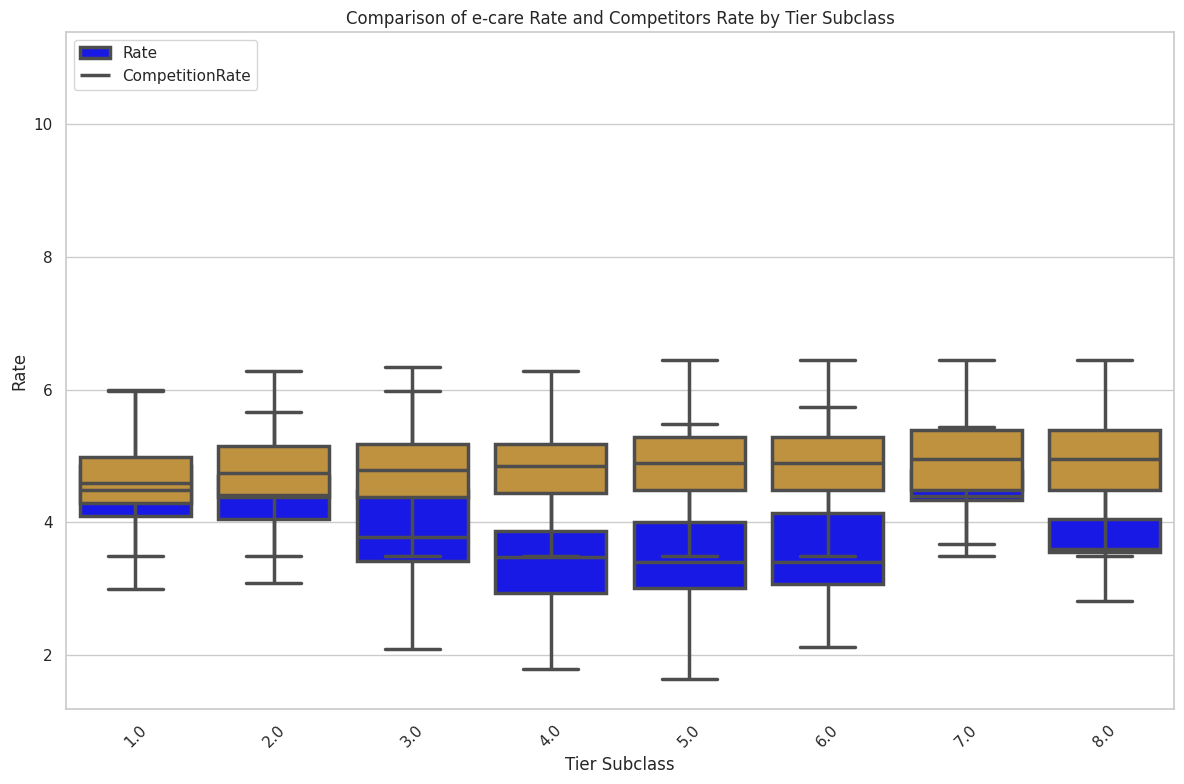

In [ ]:
#lets Visualize the rate difference compared to the rate offered by our competitors
# Create a box plot of Rate and CompetitionRate grouped by TierSubclass
plt.figure(figsize=(12, 8))

# Plot Rate box plot with transparency and custom color
sns.boxplot(x='TierSubclass', y='Rate', data=df_new, color='blue', saturation=0.8, linewidth=2.5, fliersize=0)

# Plot CompetitionRate box plot with transparency and custom color
sns.boxplot(x='TierSubclass', y='CompetitionRate', data=df_new, color='orange', saturation=0.5, linewidth=2.5, fliersize=0)

# Add legend with custom labels and colors
plt.legend(labels=['Rate', 'CompetitionRate'], loc='upper left')

# Add title and labels
plt.title('Comparison of e-care Rate and Competitors Rate by Tier Subclass')
plt.xlabel('Tier Subclass')
plt.ylabel('Rate')

# Adjust plot layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


By segmenting the data more and dividing the tiers in to two (8 tiers overall). We were able to increase the acceptance rate by 10%.